<a href="https://colab.research.google.com/github/Dmitriy6655/-python-DS-ITOGOVAYA/blob/main/sem_10_itog_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Урок 10. Практическое применение метода K-Means. Иерархическая кластеризация
Цель: Проанализировать данные о заработной плате сотрудников из файла ds_salaries.csv и построить модели машинного обучения для прогнозирования заработной платы.

Задачи:

1. Первичный анализ данных:
— Импортировать данные из файла ds_salaries.csv.
— Очистить данные от дубликатов и пропущенных значений.
— Исследовать типы данных, описательную статистику и корреляции между признаками.
— Визуализировать данные с помощью Matplotlib и Seaborn.

2. Построение модели линейной регрессии:
— Разделить данные на обучающую и тестовую выборки.
— Построить модель линейной регрессии для прогнозирования заработной платы.
— Оценить качество модели с помощью метрик MAE, MSE и R-квадрат.
— Проанализировать значимость признаков и мультиколлинеарность.

3. Построение модели дерева решений:
— Построить модель дерева решений для прогнозирования заработной платы.
— Оценить качество модели с помощью метрик RMSE и R-квадрат.
— Подберите гиперпараметры для модели дерево решений
— Визуализировать дерево решений.

4. Построение ансамблевой модели:
— Построить ансамблевую модель, используя Random Forest и Boosting.
— Сравнить качество ансамблевой модели с отдельными моделями.
— Оценить важность признаков в ансамблевой модели.

5. Понижение размерности:
— Применить Principal Component Analysis (PCA) для снижения размерности данных.
— Построить модель линейной регрессии с использованием данных, полученных после PCA.
— Сравнить качество модели с использованием исходных данных.

7. Кластеризация:
— Применить метод K-Means для кластеризации данных по заработной плате.
— Определить оптимальное количество кластеров.
— Проанализировать характеристики полученных кластеров.
— Визуализировать результаты кластеризации и проанализировать характеристики в каждом кластере.
— Проанализируйте полученные данные и сделайте выводы о том, какой алгоритм кластеризации сможет выделить кластеры лучше, чем K-Means.

Информация о наборе данных:



*   work_year - год основания компании;
*   experience_level - уровень опыта;
* employment type - тип занятости;
* job_title -должность;
* salary - уровень ЗП;
* salary_currency - валюта ЗП;
* salary_in_usd - ЗП в USD;
* employee_residence - служебное жилье;
* remote_ratio - удаленная работа;
* company_location - месторасположение компании;
* company_size - индекс количества сотрудников в комапнии.











Импортировать данные из файла ds_salaries.csv.

In [8]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from bayes_opt import BayesianOptimization


In [7]:
 pip install bayesian-optimization

###Первичный анализ

Посмотрим первые 5 строк данных:

In [9]:
df = pd.read_csv('ds_salaries.csv')

In [10]:
ds_salaries = pd.read_csv('ds_salaries.csv')
ds_salaries.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Загружаем данные и удаляем выбросы:

In [24]:
ds_salaries.info()
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'work_year')
df = remove_outliers(df, 'salary')
df = remove_outliers(df, 'salary_in_usd')

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3745,2021,SE,FT,Director of Data Science,168000,USD,168000,JP,0,JP,S
3746,2021,MI,FT,Data Scientist,160000,SGD,119059,SG,100,IL,M
3748,2021,MI,FT,Data Engineer,24000,EUR,28369,MT,50,MT,L
3749,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L


Убедимся что нет пропусков данных:

In [27]:
df.isna().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


1. Данны состоят из 3755 наблюдений
(строк) и 11 переменных (столбцов).
2. Переменные состоят из следюущих типов: 4 целочисленных типа данных и 7 объектов.
3. Нет пропущенных значений в данных, так как для каждой переменной количество non-null значений равно общему количеству наблюдений (3755).
4. Переменная 'salary' является целевой переменной (зависимой переменной), которую нужно предсказывать или анализировать в зависимости от других переменных.
5. Переменные 'work_year', 'salary_in_usd', 'remote_ratio' представляют собой категориальные переменные, так как имеют целочисленный тип данных.


###Статистические характеристики признаков

 df.describe().T - функция транспонирования сводной статистики в библиотеке Pandas.

Она позволяет поменять оси местами, и по горизонтали будут уже статистические параметры.

In [28]:
ds_salaries.describe().T.style.background_gradient(cmap='YlGnBu')

,count,mean,std,min,25%,50%,75%,max
work_year,3755.000000,2022.373635,0.691448,2020.000000,2022.000000,2022.000000,2023.000000,2023.000000
salary,3755.000000,190695.571771,671676.500508,6000.000000,100000.000000,138000.000000,180000.000000,30400000.000000
salary_in_usd,3755.000000,137570.389880,63055.625278,5132.000000,95000.000000,135000.000000,175000.000000,450000.000000
remote_ratio,3755.000000,46.271638,48.589050,0.000000,0.000000,0.000000,100.000000,100.000000


Выясним количество сотрудников по параметру remote_ratio:

In [31]:
df.remote_ratio.value_counts()

,count
remote_ratio,
0,1860
100,1546
50,141


На основе представленных статистических данных можно сделать следующие выводы:
1. Средняя ЗП сотрудников составляет 137570 USD, минимальная 5132 USD, максимальная 450000 USD.Половина сотрудникков имею ЗП в диапазоне от 95000 USD до 175000 USD.
2. Более 50 % (1860) сотрудников компании работают только удаленно.Около 5% (141) сотрудников работают и удаленно и в офисе.Остальные сотрудники (1546) работают только в офисе.


###Exploratory Data Analysis (EDA) Исследовательский анализ данных

Посмотрим количество уникальных значений в параметрах:

In [32]:
pd.concat([df.dtypes, df.nunique()], axis=1).rename(columns={0: "Type", 1: "Number of unique"})

,Type,Number of unique
work_year,int64,3
experience_level,object,4
employment_type,object,4
job_title,object,87
salary,int64,712
salary_currency,object,12
salary_in_usd,int64,897
employee_residence,object,74
remote_ratio,int64,3
company_location,object,67


Визуализируем данные:

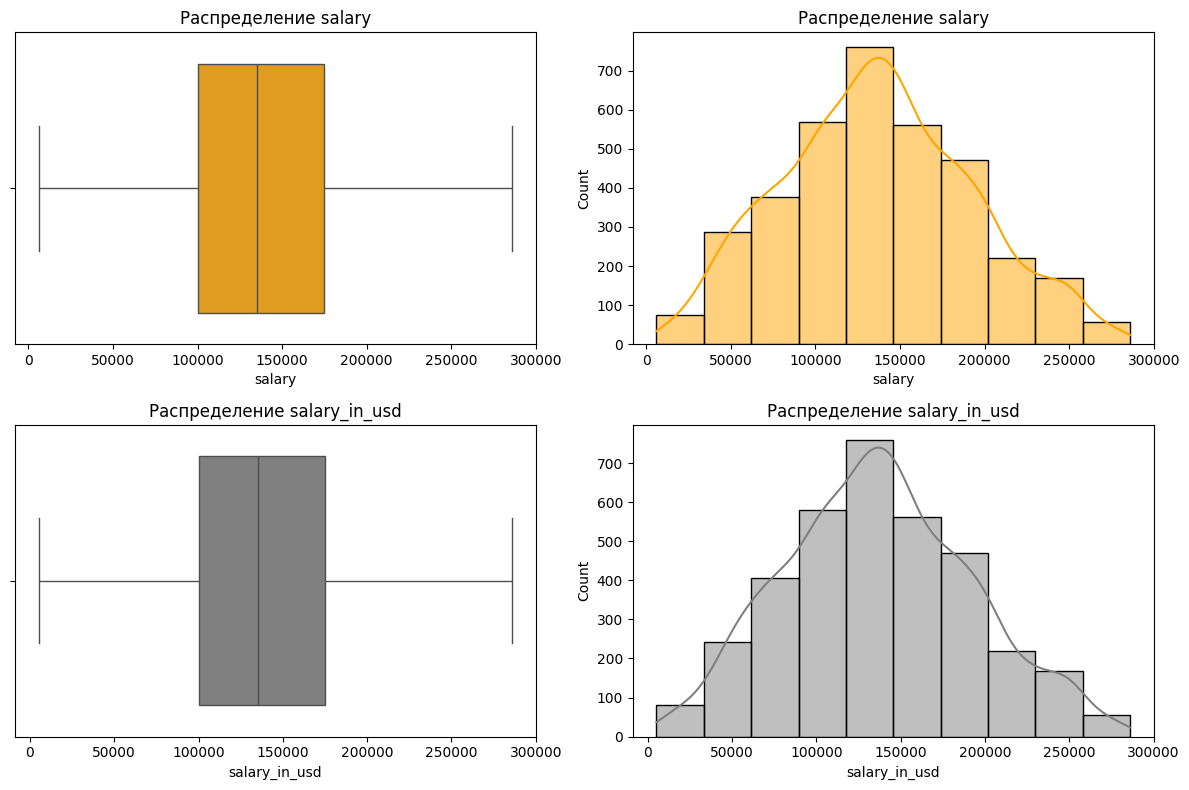

In [34]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x=df['salary'], color='orange')
plt.title('Распределение salary')

plt.subplot(2, 2, 2)
sns.histplot(df['salary'], bins=10, kde=True, color='orange')
plt.title('Распределение salary')

plt.subplot(2, 2, 3)
sns.boxplot(x=df['salary_in_usd'], color='grey')
plt.title('Распределение salary_in_usd')

plt.subplot(2, 2, 4)
sns.histplot(df['salary_in_usd'], bins=10, kde=True, color='grey')
plt.title('Распределение salary_in_usd')

plt.tight_layout()
plt.show()

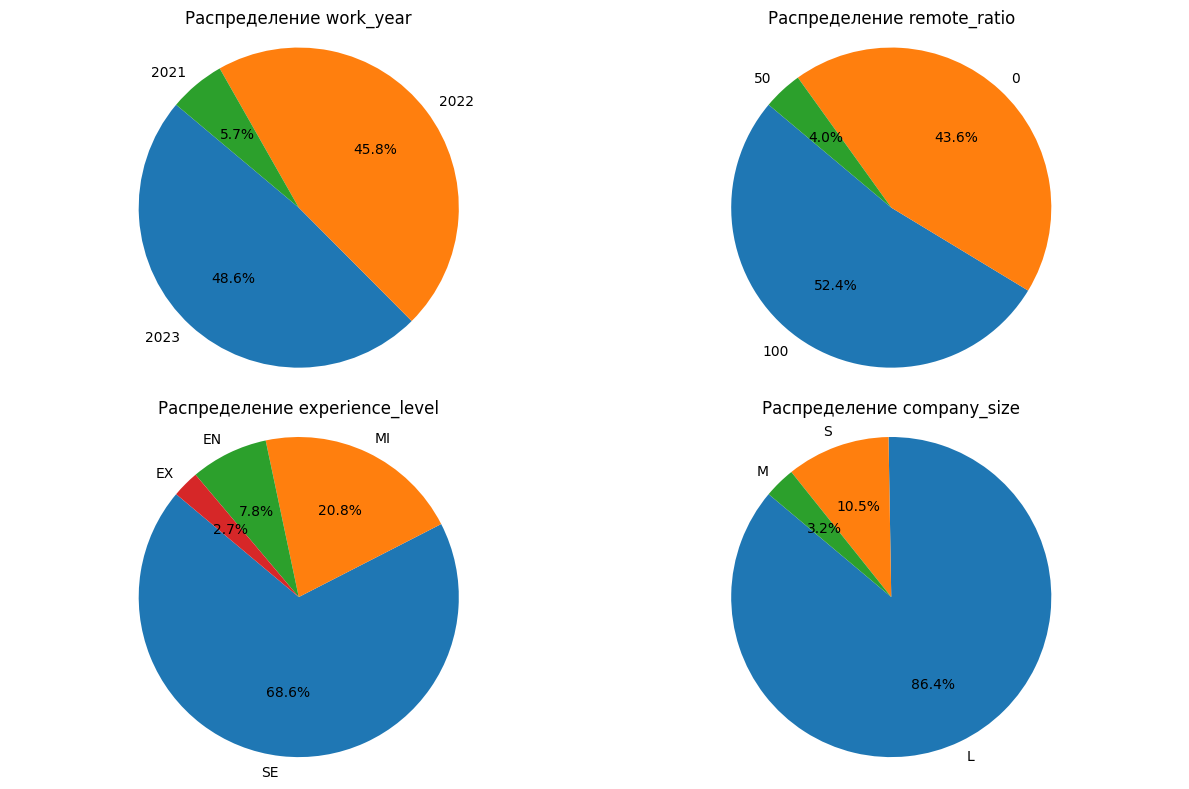

In [35]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.pie(df['work_year'].value_counts(), labels=df['work_year'].unique(),
autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Распределение work_year')

plt.subplot(2, 2, 2)
plt.pie(df['remote_ratio'].value_counts(), labels=df['remote_ratio'].unique(),
autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Распределение remote_ratio')

plt.subplot(2, 2, 3)
plt.pie(df['experience_level'].value_counts(), labels=df['experience_level'].unique(),
autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Распределение experience_level')

plt.subplot(2, 2, 4)
plt.pie(df['company_size'].value_counts(), labels=df['company_size'].unique(),
autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Распределение company_size')

plt.tight_layout()
plt.show()


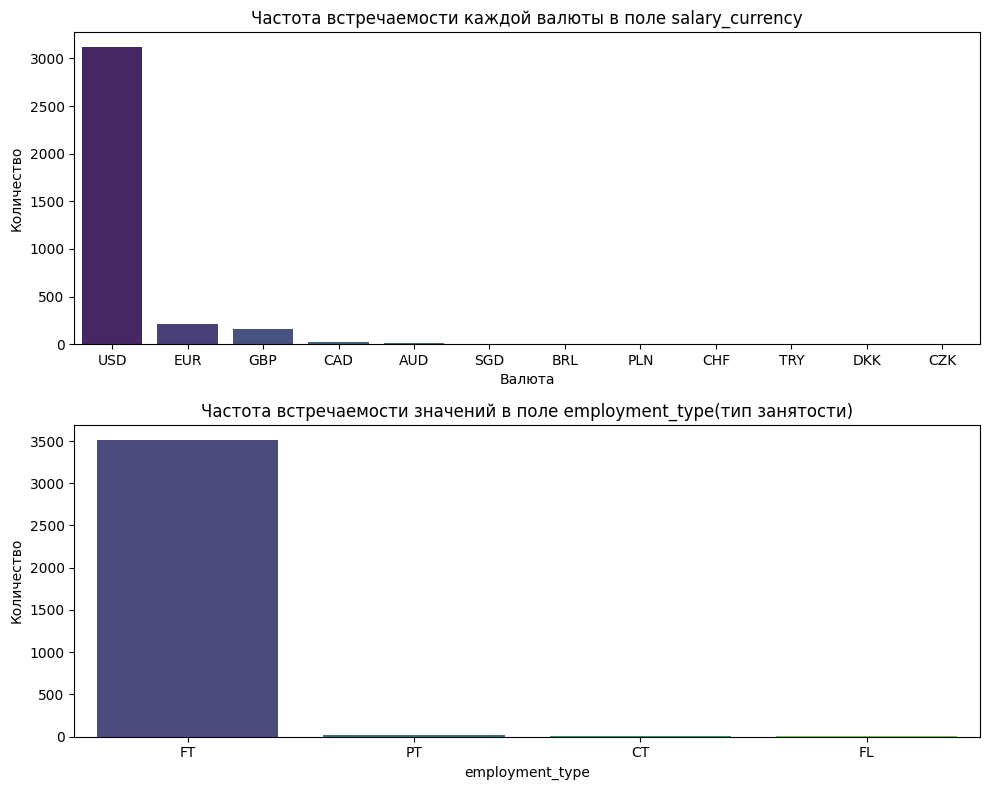

In [37]:
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
sns.countplot(data=df, x='salary_currency', palette='viridis', order=df['salary_currency'].value_counts().index)
plt.title('Частота встречаемости каждой валюты в поле salary_currency(валюта заработной платы)')
plt.xlabel('Валюта')
plt.ylabel('Количество')

plt.subplot(2, 1, 2)
sns.countplot(data=df, x='employment_type', palette='viridis', order=df['employment_type'].value_counts().index)
plt.title('Частота встречаемости значений в поле employment_type(тип занятости)')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()


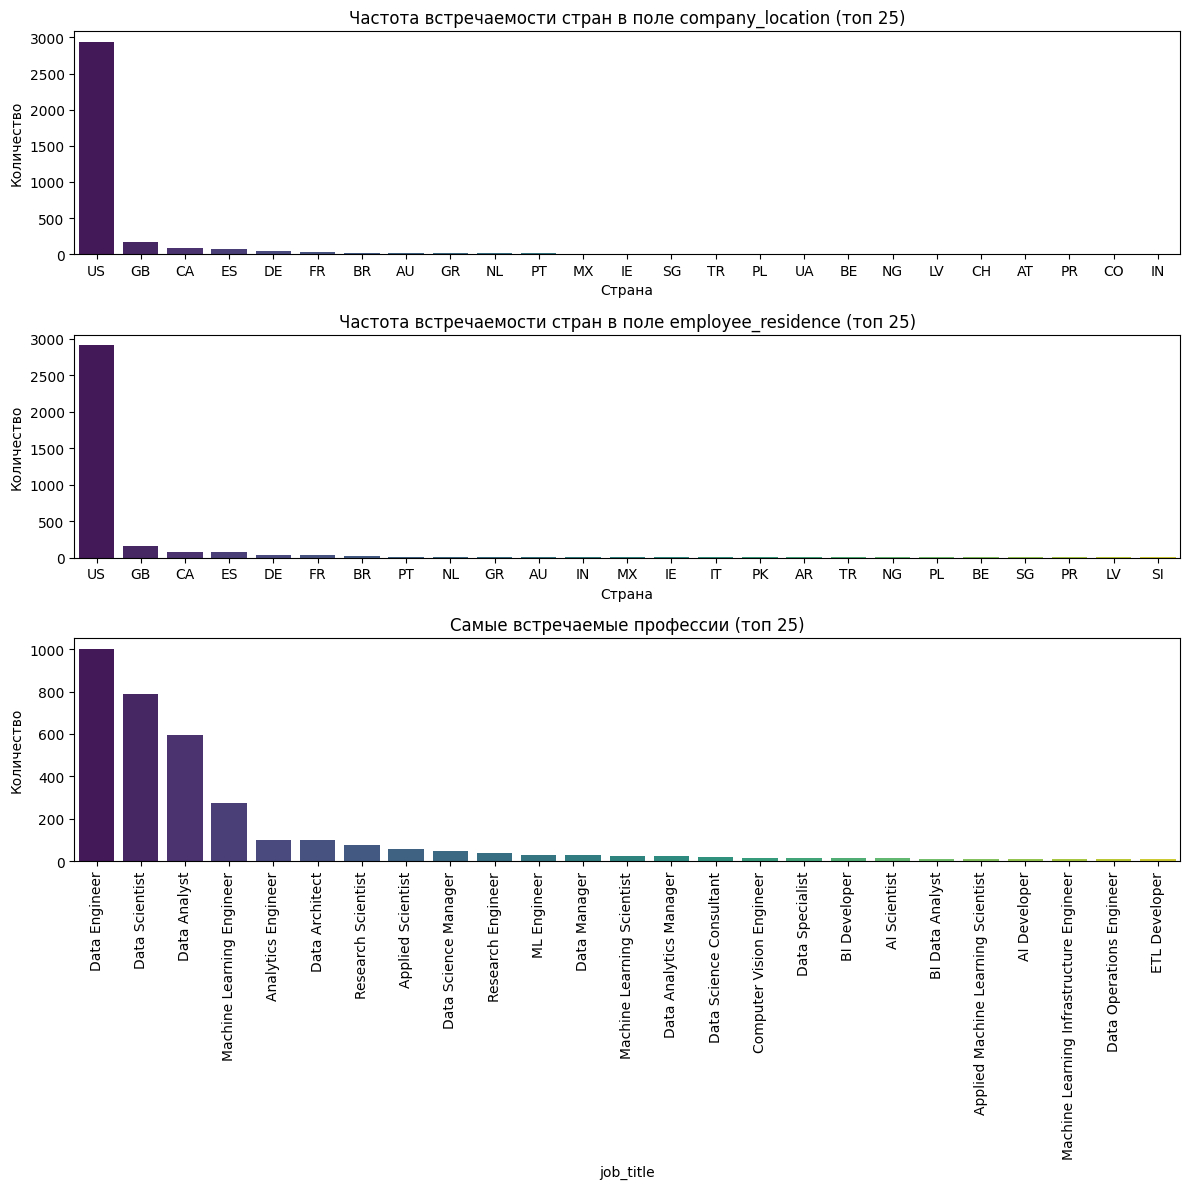

In [38]:
warnings.filterwarnings("ignore")

plt.figure(figsize=(12, 12))

plt.subplot(3, 1, 1)
top_25_countries = df['company_location'].value_counts().nlargest(25).index
sns.countplot(data=df[df['company_location'].isin(top_25_countries)],
              x='company_location',
              palette='viridis',
              order=top_25_countries)

plt.title('Частота встречаемости стран в поле company_location (топ 25)')
plt.xlabel('Страна')
plt.ylabel('Количество')

plt.subplot(3, 1, 2)
top_25_countries = df['employee_residence'].value_counts().nlargest(25).index
sns.countplot(data=df[df['employee_residence'].isin(top_25_countries)],
              x='employee_residence',
              palette='viridis',
              order=top_25_countries)
plt.title('Частота встречаемости стран в поле employee_residence (топ 25)')
plt.xlabel('Страна')
plt.ylabel('Количество')

plt.subplot(3, 1, 3)
top_25_job = df['job_title'].value_counts().nlargest(25).index
sns.countplot(data=df[df['job_title'].isin(top_25_job)],
              x='job_title',
              palette='viridis',
              order=top_25_job)
plt.title('Самые встречаемые профессии (топ 25)')
plt.ylabel('Количество')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

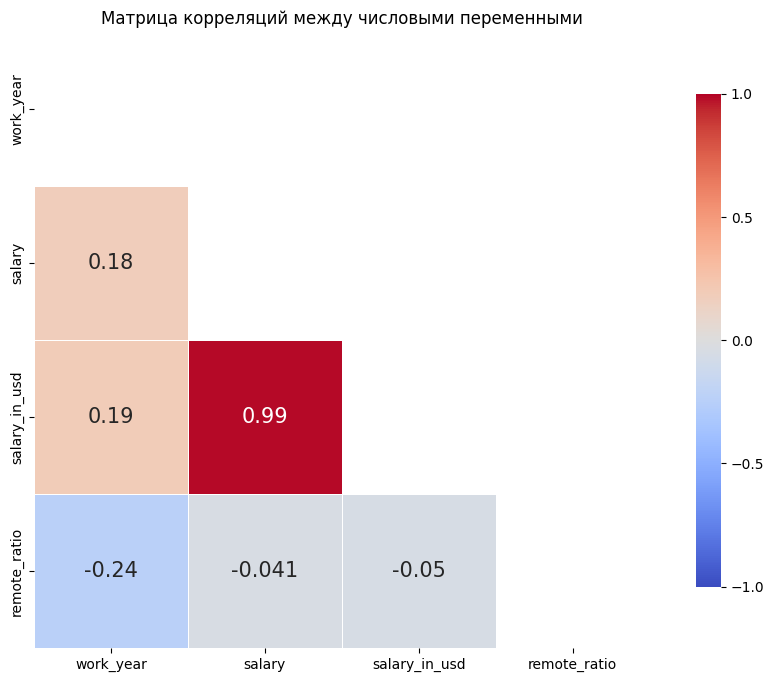

In [39]:
df_numeric = df.select_dtypes(include=['number']).copy()

correlation_matrix = df_numeric.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot_kws={"size": 15},
            cbar_kws={"shrink": 0.8, "orientation": "vertical", "ticks": [-1, -0.5, 0, 0.5, 1]})
plt.title('Матрица корреляций между числовыми переменными')
plt.show()

###Трансформация признаков

* Удалим поле salary_in_usd из дата-фрейма
* Преобразуем категориальные переменные